## 1. Importar las Librerías Necesarias

In [1]:
# Importación de Librerías -EDA
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud

%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

## 2. Leer los Datos


In [2]:
# Datos Tabulares
train = pd.read_csv('https://raw.githubusercontent.com/patsarmitagle/LABO2/main/input/train.csv')

In [3]:
train.shape

(14993, 24)

In [4]:
train.head() 

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


## 3. EDA


#### Pre-procesamiento:

* Chequear Nulos y Decidir si Imputar o Descartar


In [5]:
#Chequeamos todos los nulos del dataset y decidimos que hacer con ellos

nulos= train.isnull().sum()
print(nulos)

Type                0
Name             1265
Age                 0
Breed1              0
Breed2              0
Gender              0
Color1              0
Color2              0
Color3              0
MaturitySize        0
FurLength           0
Vaccinated          0
Dewormed            0
Sterilized          0
Health              0
Quantity            0
Fee                 0
State               0
RescuerID           0
VideoAmt            0
Description        13
PetID               0
PhotoAmt            0
AdoptionSpeed       0
dtype: int64


Separamos el dataset en dos, uno para perros y otro para gatos para analizarlos

In [9]:
# Filtrar los datos de perros y gatos
dogs = train[train['Type'] == 1]
cats = train[train['Type'] == 2]
dogs.head()
cats.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Quantity_group
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1
5,2,NaN,3,266,0,2,5,6,0,2,1,2,2,2,1,1,0,41326,22fe332bf9c924d4718005891c63fbed,0,This is a stray kitten that came to my house. ...,d24c30b4b,2.0,2,1
6,2,BULAT,12,264,264,1,1,0,0,2,3,2,2,3,1,1,300,41326,1e0b5a458b5b77f5af581d57ebf570b3,0,anyone within the area of ipoh or taiping who ...,1caa6fcdb,3.0,1,1
8,2,NaN,2,265,0,2,6,0,0,2,2,2,2,2,1,1,0,41326,d8af7afece71334473575c9f70daf00d,0,"healthy and active, feisty kitten found in nei...",c06d167ca,6.0,1,1


In [7]:
# Contar adopciones por raza para perros
dog_breeds_adopted = dogs.groupby('Breed1')['AdoptionSpeed'].count().reset_index()
dog_breeds_adopted.columns = ['Breed1', 'AdoptionCount']
dog_breeds_adopted = dog_breeds_adopted.sort_values(by='AdoptionCount', ascending=False).head(10)
 
# Contar adopciones por raza para gatos
cat_breeds_adopted = cats.groupby('Breed1')['AdoptionSpeed'].count().reset_index()
cat_breeds_adopted.columns = ['Breed1', 'AdoptionCount']
cat_breeds_adopted = cat_breeds_adopted.sort_values(by='AdoptionCount', ascending=False).head(10)




C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\994912139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Breed1', y='AdoptionCount', data=dog_breeds_adopted, palette='viridis')


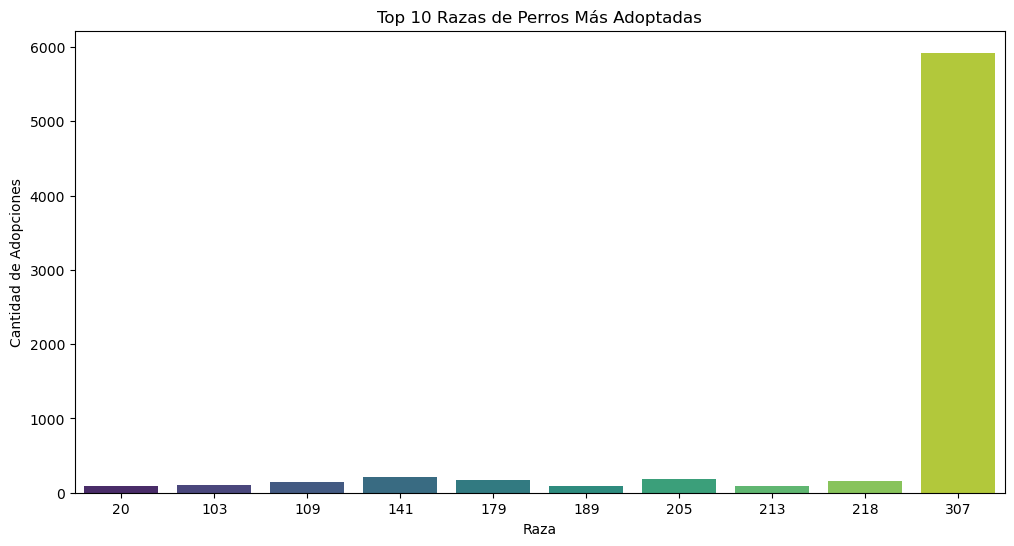

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\994912139.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Breed1', y='AdoptionCount', data=cat_breeds_adopted, palette='magma')


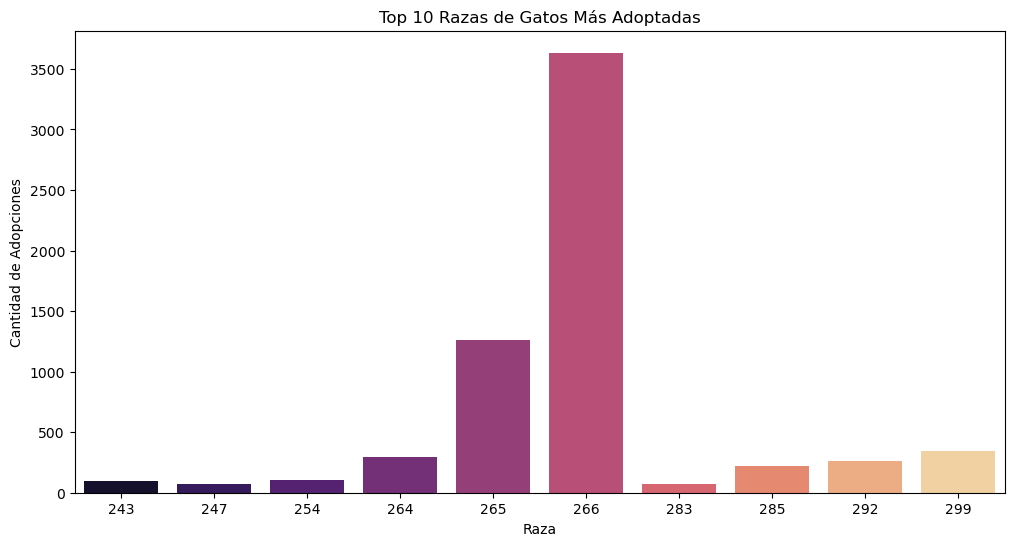

In [8]:

# Gráfico de las razas más adoptadas para perros según Breed1

plt.figure(figsize=(12, 6))

sns.barplot(x='Breed1', y='AdoptionCount', data=dog_breeds_adopted, palette='viridis')

plt.title('Top 10 Razas de Perros Más Adoptadas')

plt.xlabel('Raza')

plt.ylabel('Cantidad de Adopciones')

plt.show()
 
# Gráfico de las razas más adoptadas para gatos

plt.figure(figsize=(12, 6))

sns.barplot(x='Breed1', y='AdoptionCount', data=cat_breeds_adopted, palette='magma')

plt.title('Top 10 Razas de Gatos Más Adoptadas')

plt.xlabel('Raza')

plt.ylabel('Cantidad de Adopciones')

plt.show()


In [9]:
#Analizamos los colores de las mascotas (Color 1, Color 2, Color 3)
# Contar la frecuencia de cada color en cada columna

color1_counts = train['Color1'].value_counts()

color2_counts = train['Color2'].value_counts()

color3_counts = train['Color3'].value_counts()
 
# Imprimir los resultados

print("Frecuencia de cada color en Color1:")

print(color1_counts)

print("\nFrecuencia de cada color en Color2:")

print(color2_counts)

print("\nFrecuencia de cada color en Color3:")

print(color3_counts)

# Crear una columna para la combinación de colores

train['ColorCombination'] = train[['Color1', 'Color2', 'Color3']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
 
# Contar las combinaciones de colores más comunes

color_combination_counts = train['ColorCombination'].value_counts().head(10)
 
# Imprimir los resultados

print("\nCombinaciones de colores más comunes:")

print(color_combination_counts)


Frecuencia de cada color en Color1:
Color1
1    7427
2    3750
3     947
5     884
6     684
7     667
4     634
Name: count, dtype: int64

Frecuencia de cada color en Color2:
Color2
0    4471
7    3438
2    3313
5    1128
6    1063
4     870
3     710
Name: count, dtype: int64

Frecuencia de cada color en Color3:
Color3
0    10604
7     3221
5      417
6      378
4      198
3      175
Name: count, dtype: int64

Combinaciones de colores más comunes:
ColorCombination
2_0_0    1460
1_2_0    1417
1_7_0    1375
1_2_7    1159
1_0_0    1002
2_7_0     929
7_0_0     667
5_0_0     483
1_6_7     449
6_7_0     377
Name: count, dtype: int64


C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\2642032814.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color1_counts.index, y=color1_counts.values, palette='viridis')


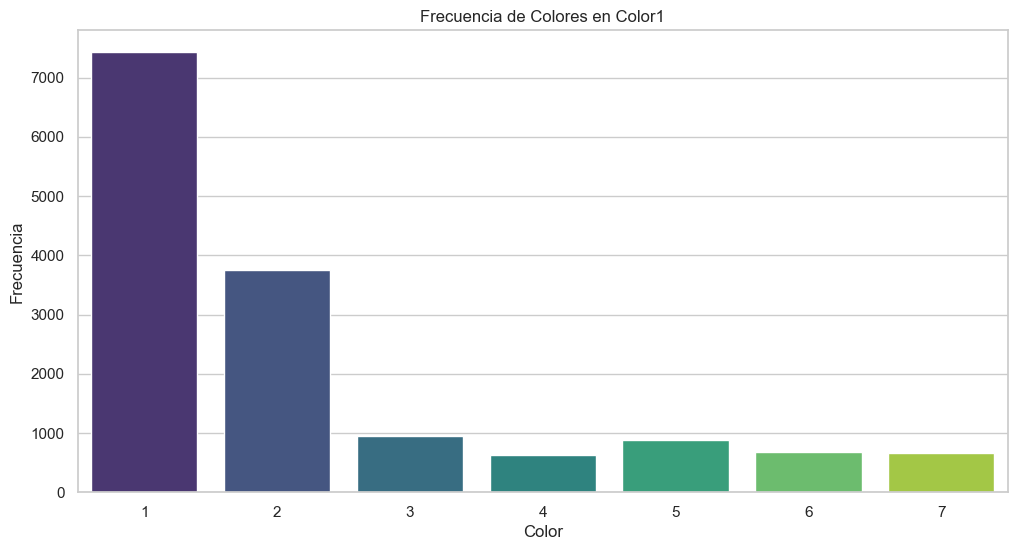

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\2642032814.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color2_counts.index, y=color2_counts.values, palette='magma')


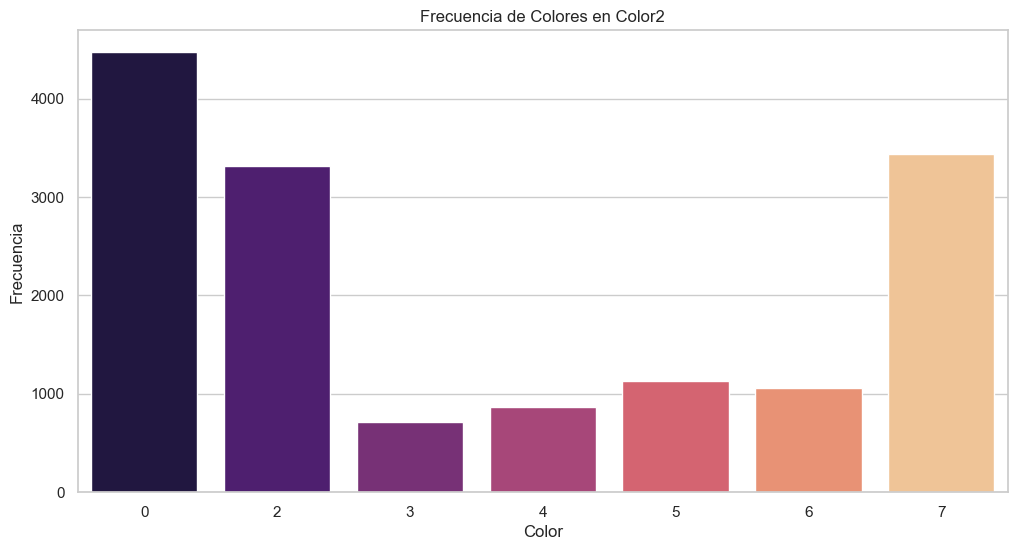

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\2642032814.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color3_counts.index, y=color3_counts.values, palette='plasma')


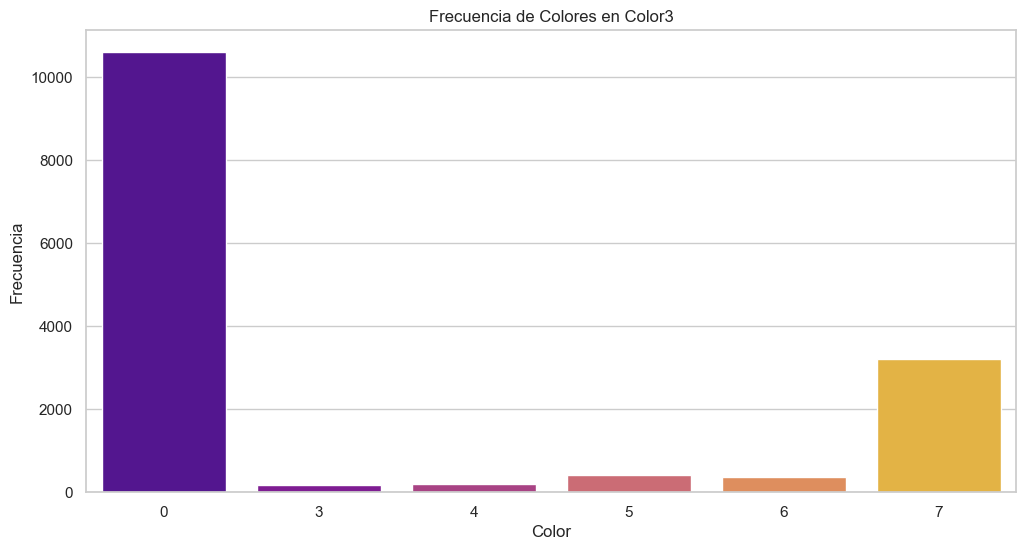

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\2642032814.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=color_combination_counts.index, y=color_combination_counts.values, palette='cubehelix')


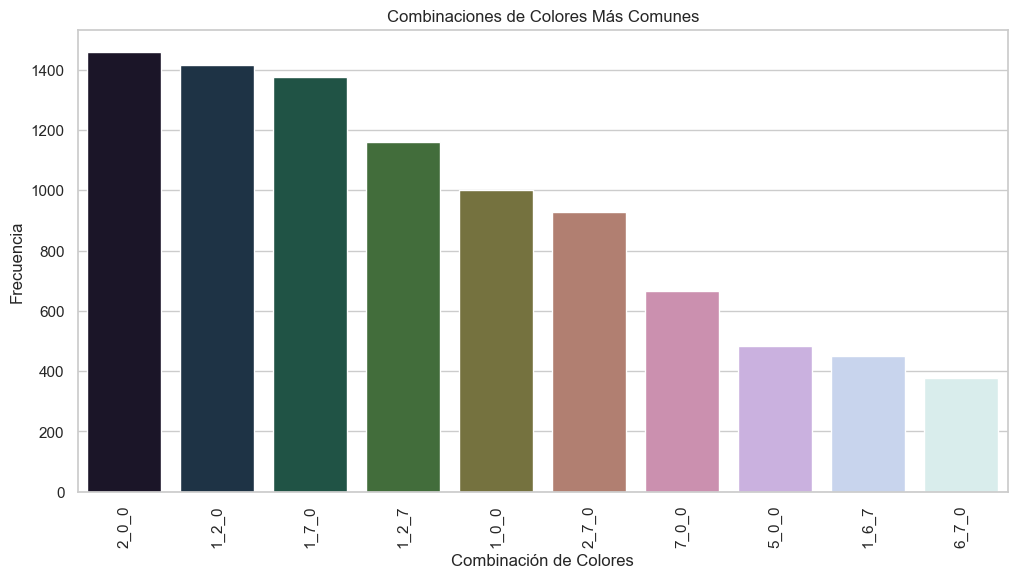

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Frecuencia de cada color en Color1
plt.figure(figsize=(12, 6))
sns.barplot(x=color1_counts.index, y=color1_counts.values, palette='viridis')
plt.title('Frecuencia de Colores en Color1')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()
 
# Frecuencia de cada color en Color2
plt.figure(figsize=(12, 6))
sns.barplot(x=color2_counts.index, y=color2_counts.values, palette='magma')
plt.title('Frecuencia de Colores en Color2')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()
 
# Frecuencia de cada color en Color3
plt.figure(figsize=(12, 6))
sns.barplot(x=color3_counts.index, y=color3_counts.values, palette='plasma')
plt.title('Frecuencia de Colores en Color3')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()
 
# Combinaciones de colores más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=color_combination_counts.index, y=color_combination_counts.values, palette='cubehelix')
plt.title('Combinaciones de Colores Más Comunes')
plt.xlabel('Combinación de Colores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#tiene menú contextual

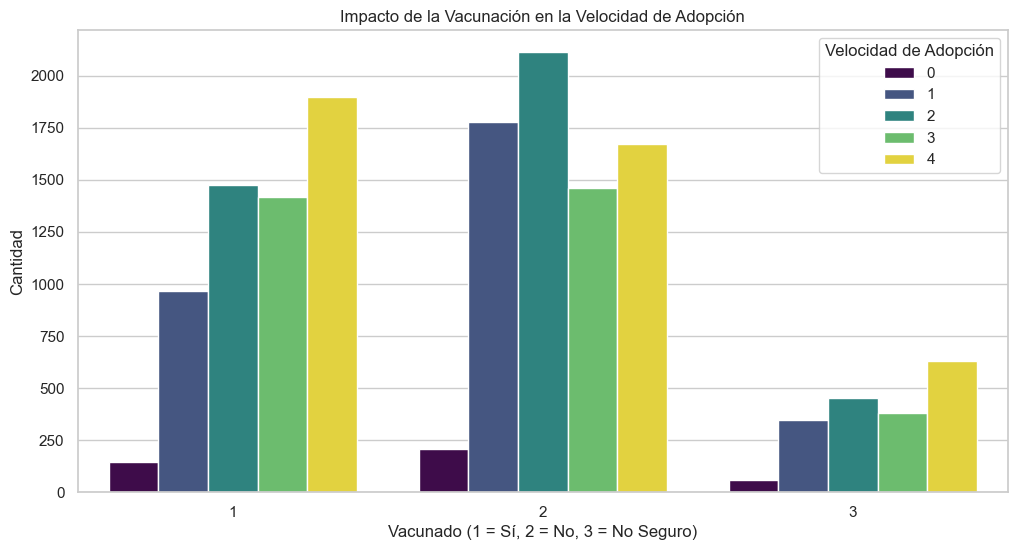

   AdoptionSpeed
0      -0.438693
1      -2.137603
2       0.410762
3      -0.438693
4      -0.438693


NameError: name 't_statistic' is not defined

In [11]:
#Variables de salud: Vaccinated
#Factores 1=si, 2=no, 3=no se sabe

# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Vaccinated' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Vaccinated', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto de la Vacunación en la Velocidad de Adopción')
plt.xlabel('Vacunado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()

#estandarizamos los datos para compararlos

# Importar la función 'StandardScaler' desde la librería 'sklearn.preprocessing'
from sklearn.preprocessing import StandardScaler
# Crear un objeto 'StandardScaler'
scaler = StandardScaler()

# Estandarizar la variable 'Age' y almacenarla en una nueva columna 'AgeNormalized'
train['AdoptionSpeed'] = scaler.fit_transform(train[['AdoptionSpeed']])

# Imprimir los resultados
print(train[['AdoptionSpeed']].head())



#resta verificar con algún test si la media de las subploblaciones es significativamente diferente:


# Importar la función 'ttest_ind' desde la librería 'scipy.stats'
from scipy.stats import ttest_ind

# Filtrar los datos para comparar las velocidades de adopción de mascotas vacunadas y no vacunadas
#vaccinated = train[train['Vaccinated'] == 1]['AdoptionSpeed']

#not_vaccinated = train[train['Vaccinated'] == 2]['AdoptionSpeed']

# Realizar el test de t de Student para comparar las medias
#t_statistic, p_value = ttest_ind(vaccinated, not_vaccinated)

# Imprimir los resultados
print("Valor del estadístico t:", t_statistic)
print("Valor de p:", p_value)

#revisar test y contrastar en otra etapa con edad de las mascotas, por ejemplo

C:\Users\HOME\AppData\Local\Temp\ipykernel_1116\4105340723.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Vaccinated', data=adopted_in_0, palette='viridis')


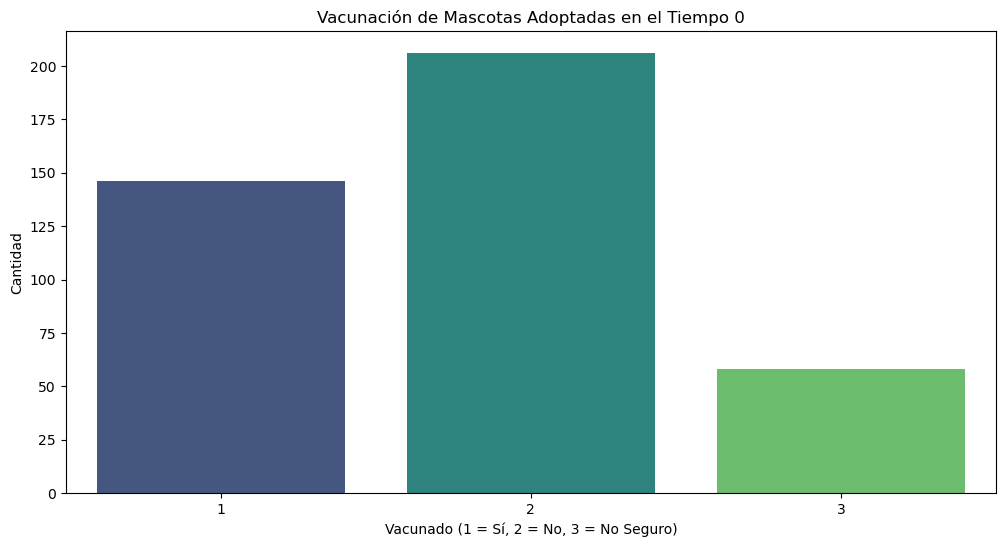

In [10]:
#Ahora verificamos la relación de mascotas adoptadas a tiempo 0 solamente y la variable Vaccinated:

# Filtrar los datos para obtener solo las mascotas adoptadas en el tiempo 0
adopted_in_0 = train[train['AdoptionSpeed'] == 0]

# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Vaccinated' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Vaccinated', data=adopted_in_0, palette='viridis')
plt.title('Vacunación de Mascotas Adoptadas en el Tiempo 0')
plt.xlabel('Vacunado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.show()



In [12]:
#ahora l ovemos en cuadro de frecuencias relativas para comparar

# Calcular la frecuencia relativa de mascotas adoptadas en el tiempo 0 para cada valor de 'Vaccinated'  
vaccinated_counts = adopted_in_0['Vaccinated'].value_counts(normalize=True)

# Imprimir los resultados
print(vaccinated_counts)



Vaccinated
2    0.502439
1    0.356098
3    0.141463
Name: proportion, dtype: float64


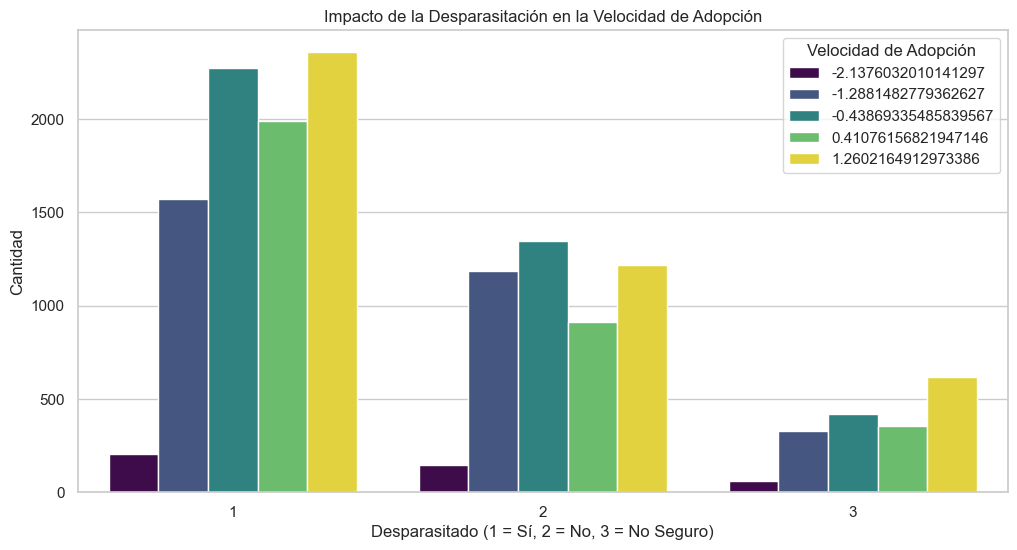

In [12]:
#Variables de salud: Dewormed
#Factores 1=si, 2=no, 3=no se sabe

# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Dewormed' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Dewormed', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto de la Desparasitación en la Velocidad de Adopción')
plt.xlabel('Desparasitado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()


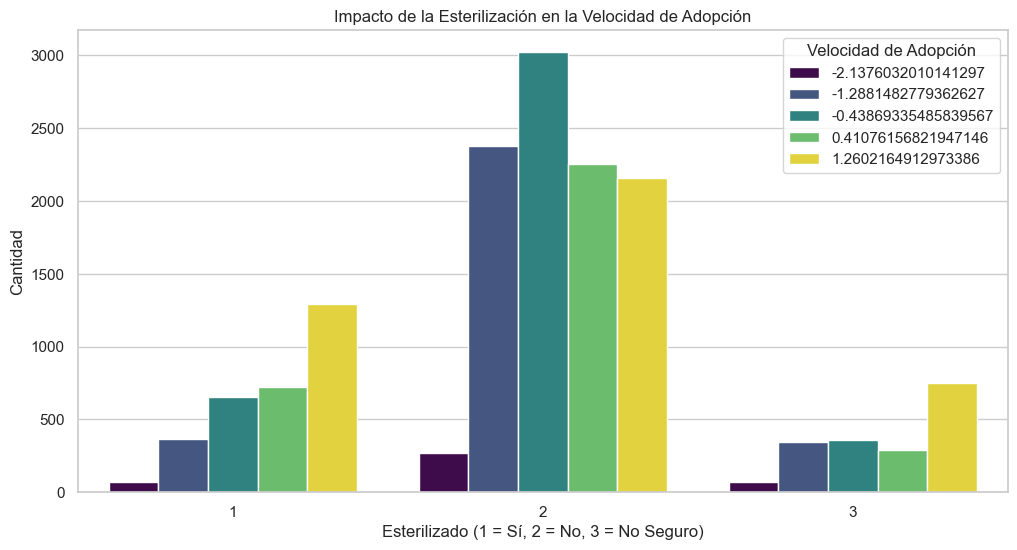

In [13]:
#Variables de salud: Sterilized
#Factores 1=si, 2=no, 3=no se sabe

# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Sterilized' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Sterilized', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto de la Esterilización en la Velocidad de Adopción')
plt.xlabel('Esterilizado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\330395037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionSpeed', y='Fee', data=train, palette='viridis')


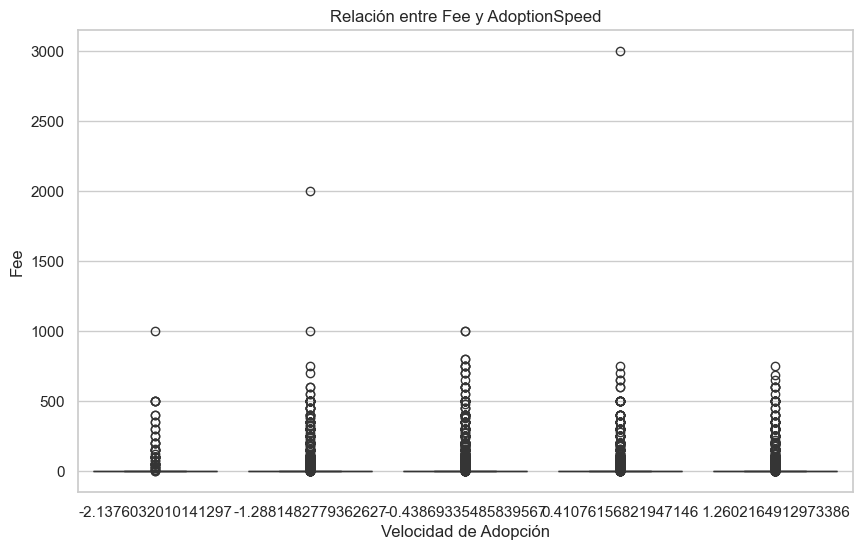

In [14]:
#analizamos el impacto del Fee cobrado
# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionSpeed', y='Fee', data=train, palette='viridis')
plt.title('Relación entre Fee y AdoptionSpeed')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Fee')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\3992115989.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AdoptionSpeed', y='Fee', data=train, palette='magma')


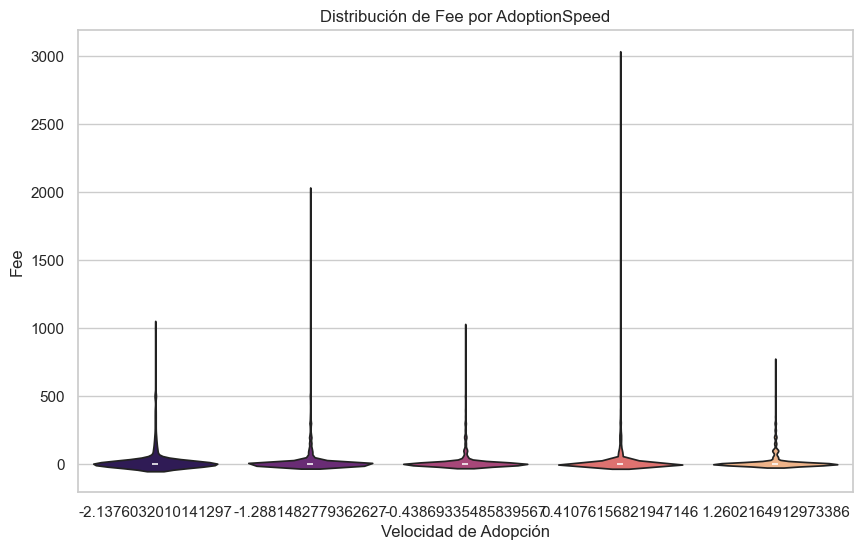

In [15]:
# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.violinplot(x='AdoptionSpeed', y='Fee', data=train, palette='magma')
plt.title('Distribución de Fee por AdoptionSpeed')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Fee')
plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_13504\3681996056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='AdoptionSpeed', y='Fee', data=train, palette='magma', inner='quartile')


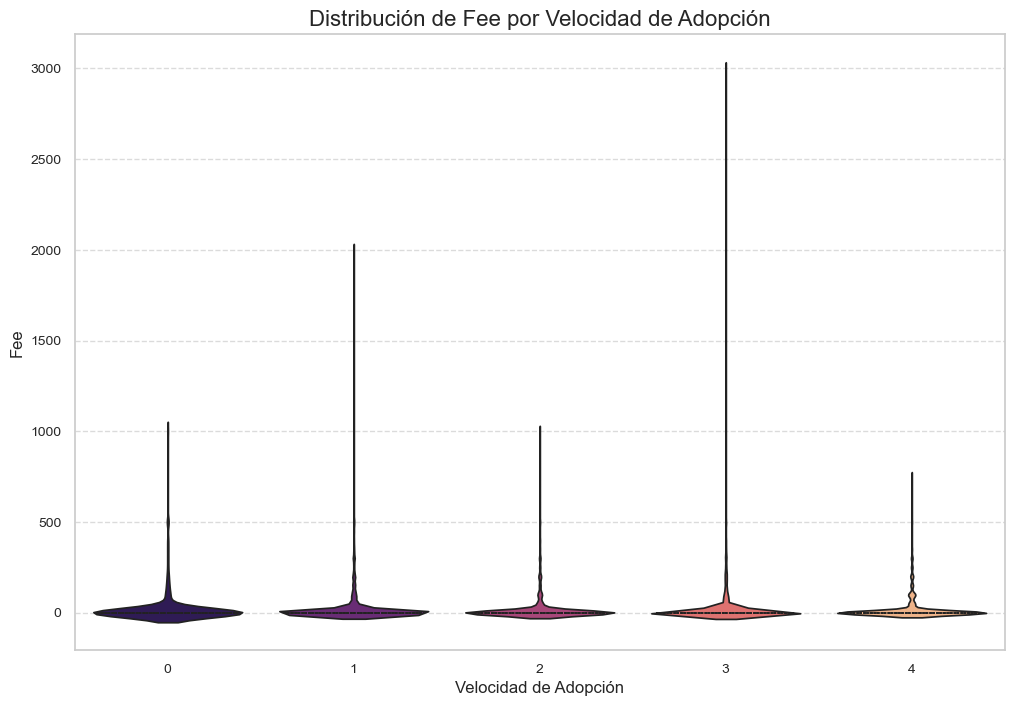

In [ ]:
#Configuración de las visualizaciones
plt.figure(figsize=(12, 8)) 
sns.violinplot(x='AdoptionSpeed', y='Fee', data=train, palette='magma', inner='quartile') 
plt.title('Distribución de Fee por Velocidad de Adopción', fontsize=16) 
plt.xlabel('Velocidad de Adopción', fontsize=12) 
plt.ylabel('Fee', fontsize=12) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()


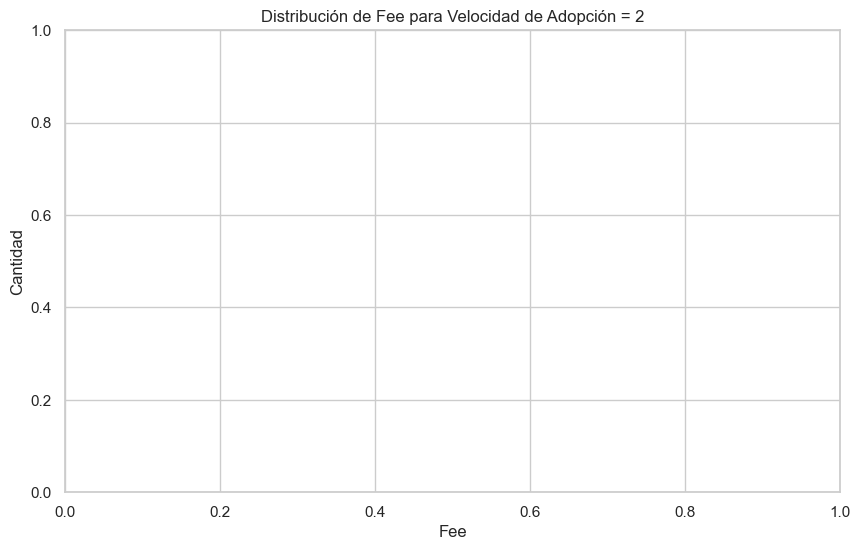

In [16]:
#Analizamos con histograma la velocidad de adopción 0 con el fee cobrado:

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.histplot(train[train['AdoptionSpeed'] == 2]['Fee'], color='blue', kde=True)
plt.title('Distribución de Fee para Velocidad de Adopción = 2')
plt.xlabel('Fee')
plt.ylabel('Cantidad')
plt.show()




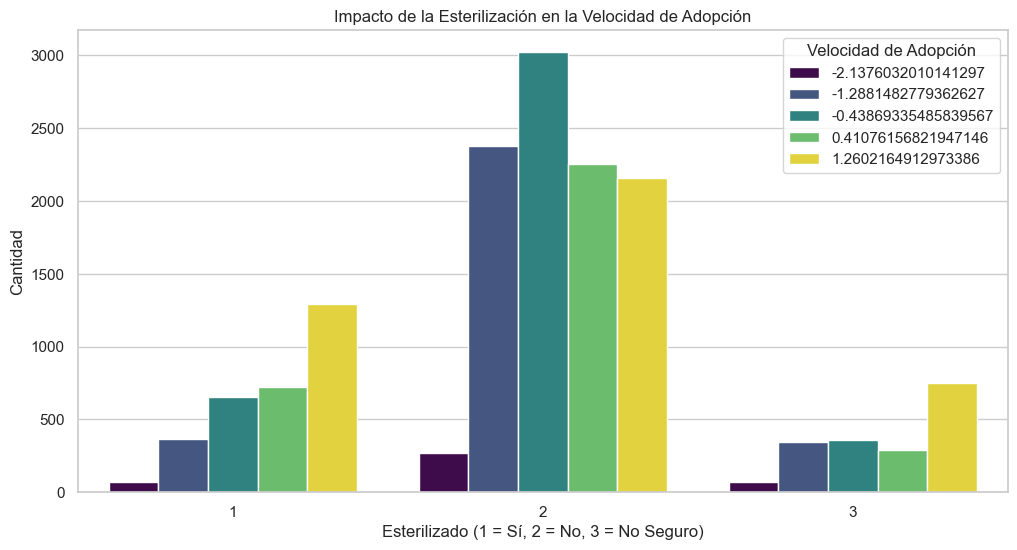

In [17]:
# Configuración de las visualizaciones
sns.set(style="whitegrid")
 
# Crear un gráfico de conteo (countplot) para visualizar la relación entre 'Fee' y 'AdoptionSpeed'
plt.figure(figsize=(12, 6))
sns.countplot(x='Sterilized', data=train, hue='AdoptionSpeed', palette='viridis')
plt.title('Impacto de la Esterilización en la Velocidad de Adopción')
plt.xlabel('Esterilizado (1 = Sí, 2 = No, 3 = No Seguro)')
plt.ylabel('Cantidad')
plt.legend(title='Velocidad de Adopción', loc='upper right')
plt.show()


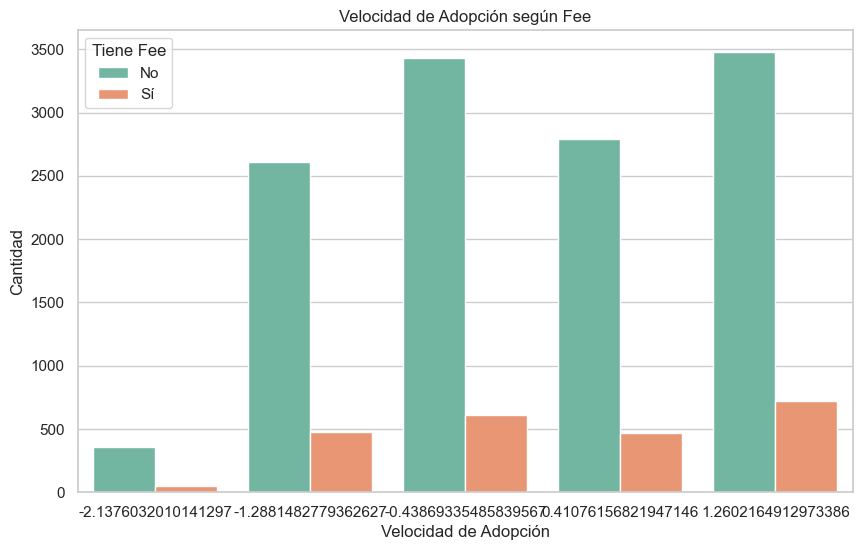

In [18]:

# Crear una columna 'Has_fee' para indicar si hay o no fee
train['Has_fee'] = train['Fee'] > 0
 
# Configurar las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Has_fee', palette='Set2')
plt.title('Velocidad de Adopción según Fee')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Tiene Fee', labels=['No', 'Sí'])
plt.show()


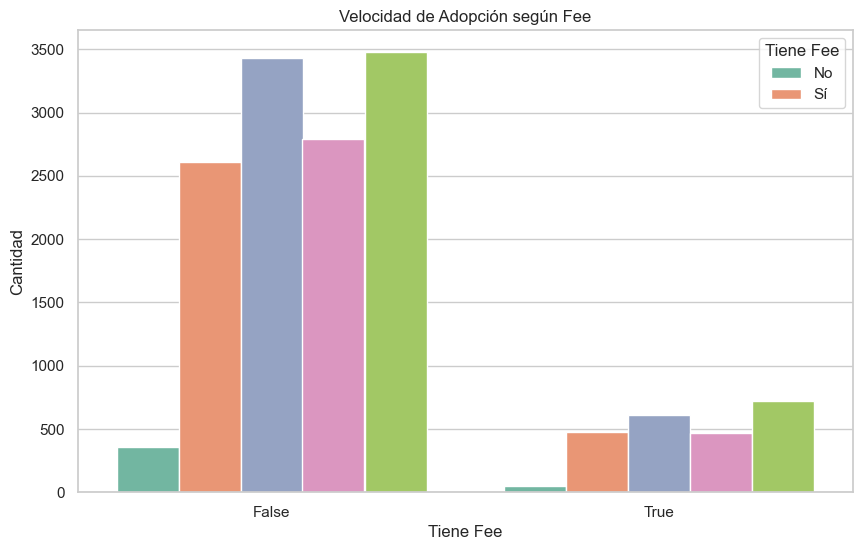

In [ ]:
# Crear una columna 'Has_fee' para indicar si hay o no fee
train['Has_fee'] = train['Fee'] > 0
 
# Configurar las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='Has_fee', data=train, hue='AdoptionSpeed', palette='Set2')
plt.title('Velocidad de Adopción según Fee')
plt.xlabel('Tiene Fee')
plt.ylabel('Cantidad')
plt.legend(title='Tiene Fee', labels=['No', 'Sí'])
plt.show()



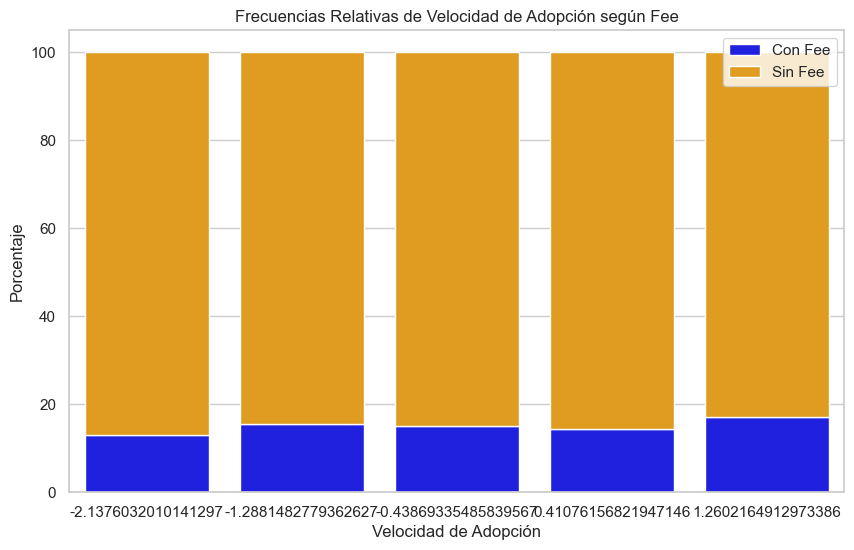

In [19]:
# Crear una columna 'Has_fee' para indicar si hay o no fee
train['Has_fee'] = train['Fee'] > 0
 
# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Has_fee'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[True], color='blue', label='Con Fee')
sns.barplot(x=freq_table.index, y=freq_table[False], color='orange', bottom=freq_table[True], label='Sin Fee')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Fee')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()

#salida: El índice de adopción relativo de las mascotas sin Fee es mayoritario, para cualquier velocidad de adopción. 
#Resulta más exitoso a los fines de adopción, que sea sin Fee.

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\1187054731.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=train, palette='viridis')


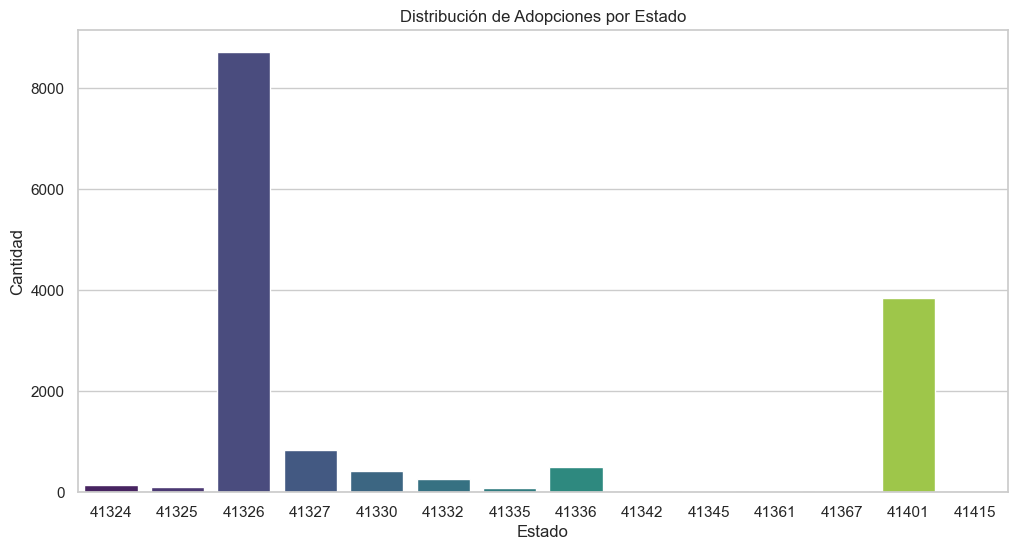

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\1187054731.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=train, palette='viridis')


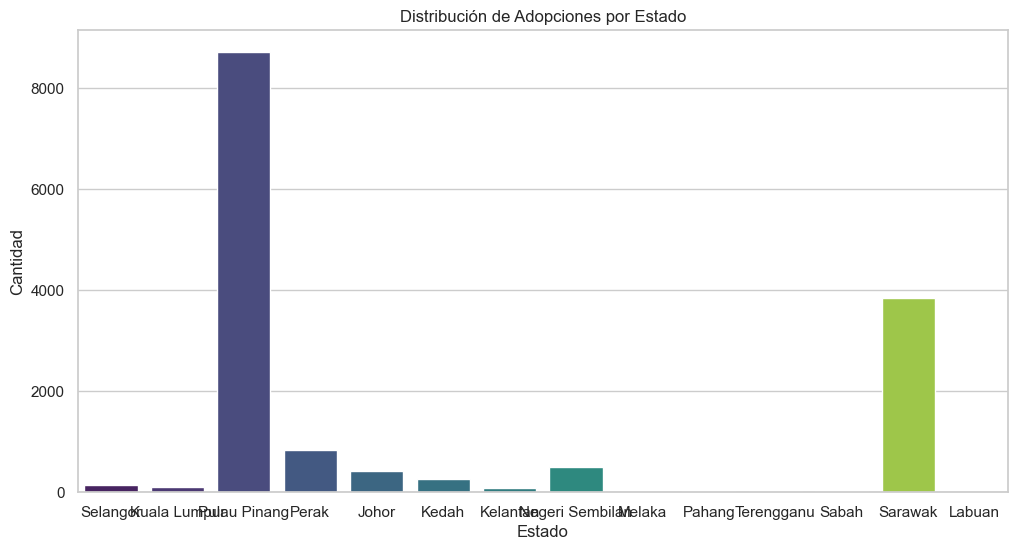

C:\Users\HOME\AppData\Local\Temp\ipykernel_14052\1187054731.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='State', data=train, palette='viridis')


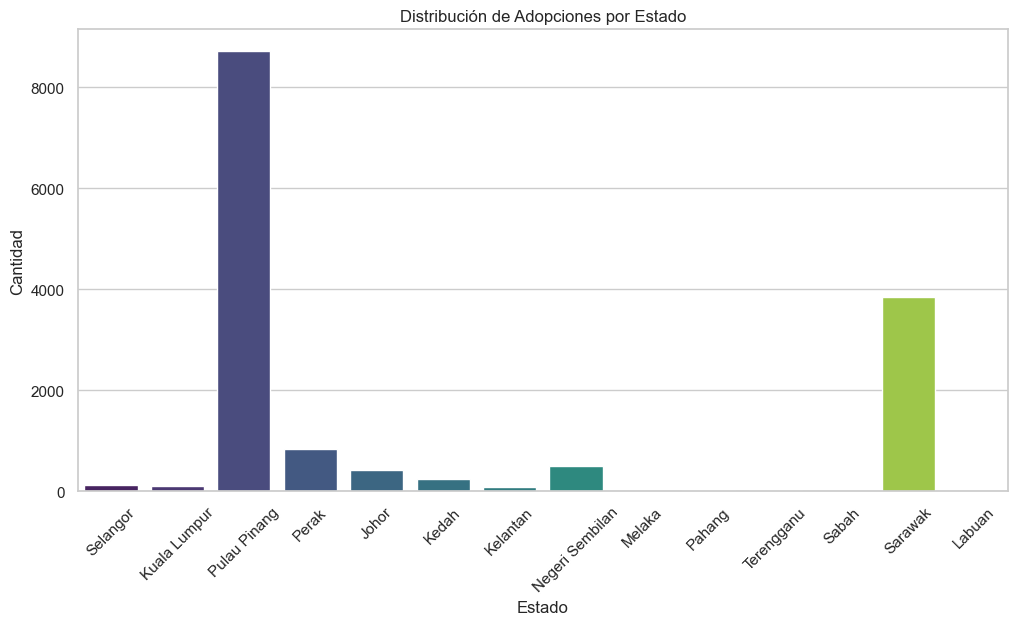

In [20]:
#Estudiamos las regiones geográficas:

#Graficamos la distribución de adopciones por región

# Configuración de las visualizaciones
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=train, palette='viridis')
plt.title('Distribución de Adopciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.show()

#Indicamos en el gráfico anterior los nombres de los Estados:

# Configuración de las visualizaciones
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=train, palette='viridis')
plt.title('Distribución de Adopciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(14), labels=['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Perak', 'Johor', 'Kedah', 'Kelantan', 'Negeri Sembilan', 'Melaka', 'Pahang', 'Terengganu', 'Sabah', 'Sarawak', 'Labuan'])
plt.show()

#Ajustamos la etiqueta del eje x para visualizar los nombre de cada estado:

# Configuración de las visualizaciones
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=train, palette='viridis')
plt.title('Distribución de Adopciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(ticks=range(14), labels=['Selangor', 'Kuala Lumpur', 'Pulau Pinang', 'Perak', 'Johor', 'Kedah', 'Kelantan', 'Negeri Sembilan', 'Melaka', 'Pahang', 'Terengganu', 'Sabah', 'Sarawak', 'Labuan'], rotation=45)
plt.show()


#Se observa que en Palau Pinang y en Sarawak, son las regiones con mayor canitdad absoluta de adopciones.



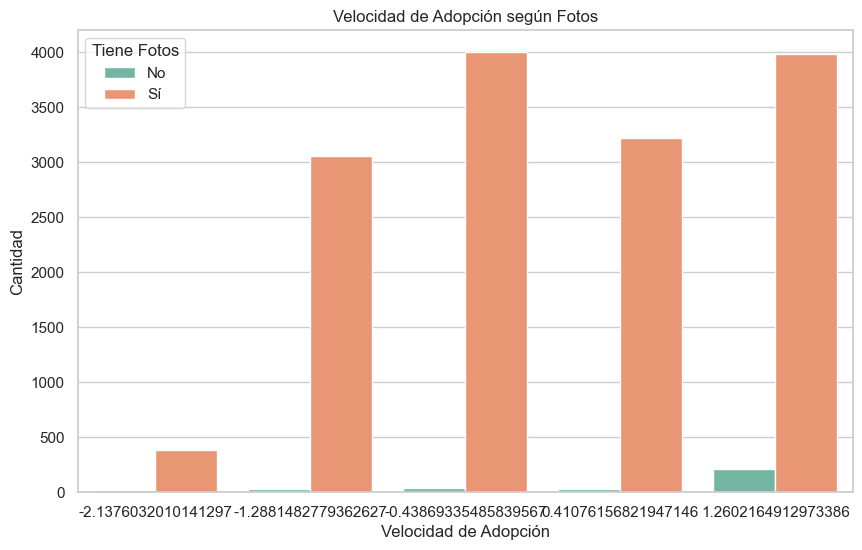

In [21]:
#analizamos el impacto de tener fotos en la adopción:

# Crear una columna 'Has_photo' para indicar si hay o no fotos
train['Has_photo'] = train['PhotoAmt'] > 0

# Configurar las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Has_photo', palette='Set2')
plt.title('Velocidad de Adopción según Fotos')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Tiene Fotos', labels=['No', 'Sí'])
plt.show()

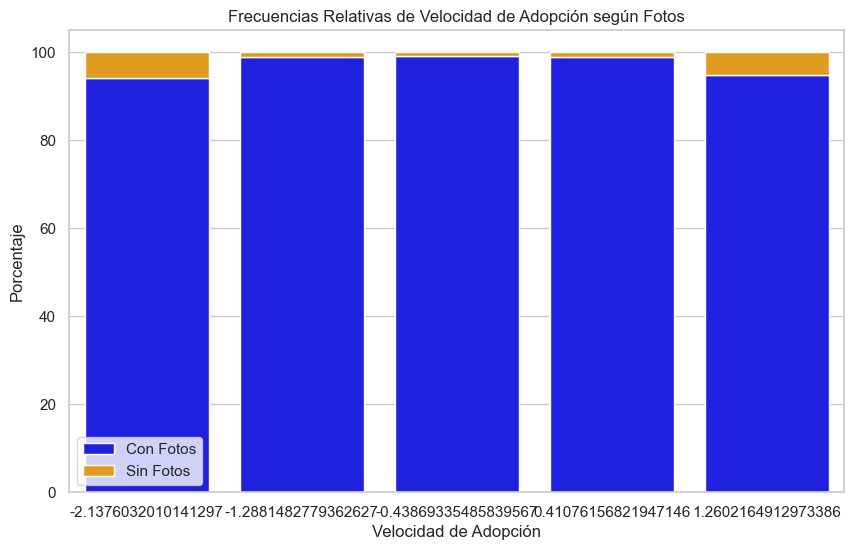

In [22]:
#Realizamos un graifco de frecuencias relativas de adopciones y fotos:

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Has_photo'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[True], color='blue', label='Con Fotos')
sns.barplot(x=freq_table.index, y=freq_table[False], color='orange', bottom=freq_table[True], label='Sin Fotos')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Fotos')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()


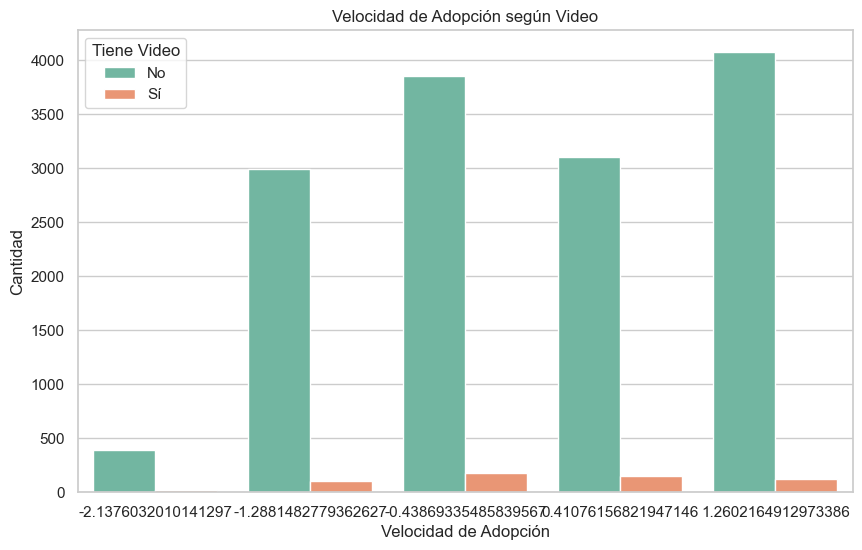

In [23]:
#analizamos el impacto de tener video en la adopción:

# Crear una columna 'Has_video' para indicar si hay o no video
train['Has_video'] = train['VideoAmt'] > 0

# Configurar las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='AdoptionSpeed', data=train, hue='Has_video', palette='Set2')
plt.title('Velocidad de Adopción según Video')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Cantidad')
plt.legend(title='Tiene Video', labels=['No', 'Sí'])
plt.show()


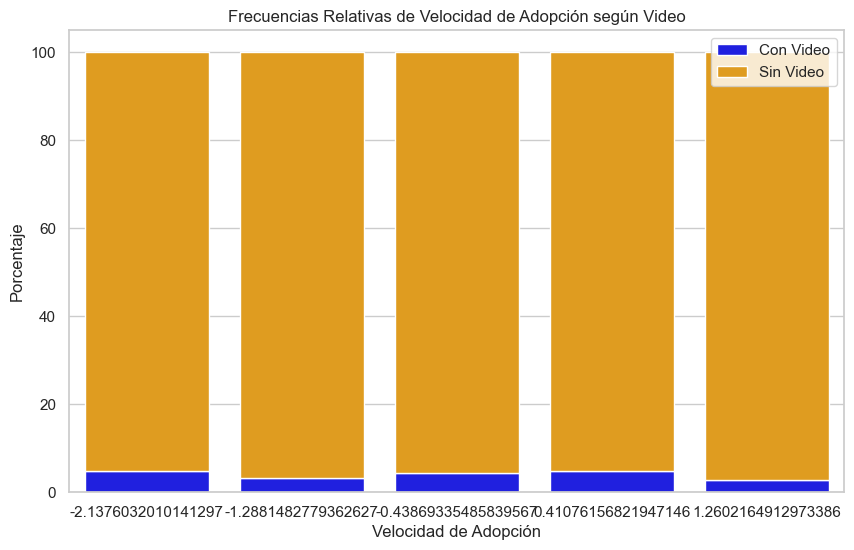

In [24]:
#Realizamos un graifco de frecuencias relativas de adopciones y videos:

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Has_video'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[True], color='blue', label='Con Video')
sns.barplot(x=freq_table.index, y=freq_table[False], color='orange', bottom=freq_table[True], label='Sin Video')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Video')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend()
plt.show()


In [25]:
#Analizamos con un test estadístico si la velocidad de adopción es significativamente diferente para las mascotas con y sin video:	

# Importar la función 'ttest_ind' desde la librería 'scipy.stats'
import scipy.stats 
from scipy.stats import ttest_ind


# Filtrar los datos para comparar las velocidades de adopción de mascotas con y sin video
video = train[train['Has_video'] == True]['AdoptionSpeed']

no_video = train[train['Has_video'] == False]['AdoptionSpeed']

# Realizar el test de t de Student para comparar las medias
t_statistic, p_value = ttest_ind(video, no_video)

# Imprimir los resultados
print("Valor del estadístico t:", t_statistic)
print("Valor de p:", p_value)

#salida: El valor de p es mayor a 0.05, por lo que NO se rechaza la hipótesis nula de que las velocidades de adopción de mascotas con y sin video son iguales.
#Corolario: el video no afecta la velocidad de adopción con un test al 5% de significancia.

Valor del estadístico t: -1.4258273845295155
Valor de p: 0.15393899622029292


In [26]:
#Analizamos la cantidad de observaciones que tienen video y su porcentaje:

# Calcular la cantidad de observaciones con video
video_count = train['Has_video'].sum()

# Calcular el porcentaje de observaciones con video
video_percentage = video_count / train.shape[0] * 100

print("Cantidad de Observaciones con Video:", video_count)

print("Porcentaje de Observaciones con Video:", video_percentage)


Cantidad de Observaciones con Video: 574
Porcentaje de Observaciones con Video: 3.828453278196492


In [28]:
#Analizamos la cantidad de observaciones que tienen foto y su porcentaje:

# Calcular la cantidad de observaciones con foto
photo_count = train['Has_photo'].sum()

# Calcular el porcentaje de observaciones con foto
photo_percentage = photo_count / train.shape[0] * 100

print("Cantidad de Observaciones con Foto:", photo_count)

print("Porcentaje de Observaciones con Foto:", photo_percentage)

Cantidad de Observaciones con Foto: 14652
Porcentaje de Observaciones con Foto: 97.72560528246515


In [29]:
#¿separamos por gratos y perros?
#Vamos a realizar un Test t de hipotesis para validar estadisticamente si el nombre influye en la adopcion

#importamos librerias
import numpy as np
import scipy.stats as stats

#realizamos la prueba de hipotesis para decidir si los nombre de las mascotas influyen en la velocidad de adopcion de las mismas
#H0: Los nombres de las mascotas no influyen en la velocidad de adopcion
#H1: Los nombres de las mascotas influyen en la velocidad de adopcion

#creamos una tabla de contingencia
tabla_contingencia = pd.crosstab(train['Name'], train['AdoptionSpeed'])
tabla_contingencia

#realizamos la prueba de chi cuadrado
chi2, p, dof, ex = stats.chi2_contingency(tabla_contingencia)
print('Chi2: ', chi2)
print('P-value: ', p)
print('Grados de libertad: ', dof)
print('Valores esperados: ', ex)

#como el p-value es 0.317 y es mayor a 0.05, no rechazamos la hipotesis nula, por lo que los nombres de las mascotas no influyen en la velocidad de adopcion.

Chi2:  36359.24399639169
P-value:  0.3175313038771268
Grados de libertad:  36232
Valores esperados:  [[0.02797203 0.20520105 0.2712704  0.22151807 0.27403846]
 [0.02797203 0.20520105 0.2712704  0.22151807 0.27403846]
 [0.02797203 0.20520105 0.2712704  0.22151807 0.27403846]
 ...
 [0.02797203 0.20520105 0.2712704  0.22151807 0.27403846]
 [0.02797203 0.20520105 0.2712704  0.22151807 0.27403846]
 [0.02797203 0.20520105 0.2712704  0.22151807 0.27403846]]


C:\Users\HOME\AppData\Local\Temp\ipykernel_1116\1943171823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quantity', data=train, palette='viridis')


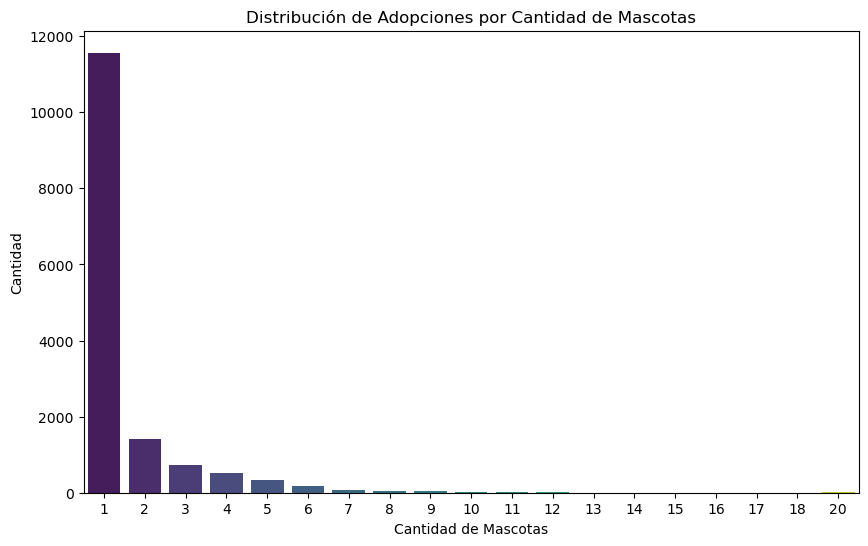

In [4]:
#Verificamos la cantidad de registros por cada categoria de la variable Quantity

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(x='Quantity', data=train, palette='viridis')
plt.title('Distribución de Adopciones por Cantidad de Mascotas')
plt.xlabel('Cantidad de Mascotas')
plt.ylabel('Cantidad')
plt.show()



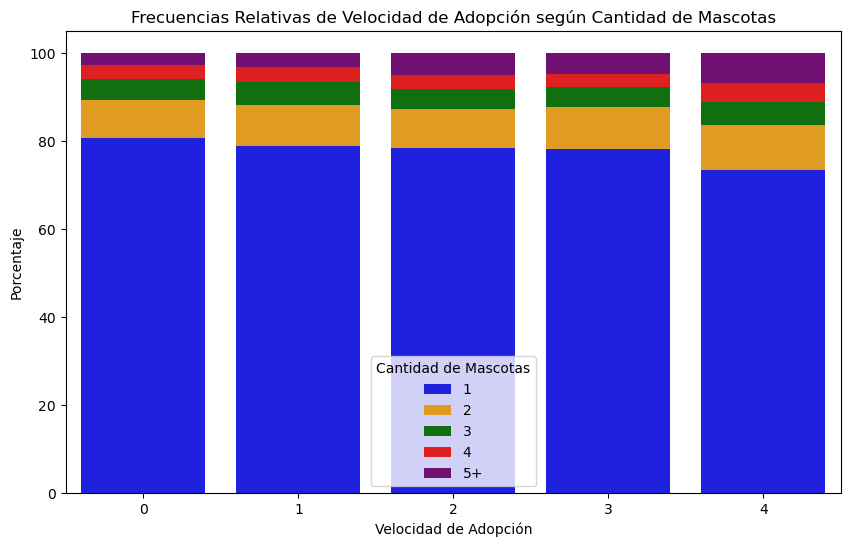

In [8]:
#Ahorai ndicar en porcentajes la cantidad de adopciones por cantidad de mascotas agrupando las mayores a 4 en un solo grupo

# Crear una columna 'Quantity_group' para agrupar las cantidades mayores a 4
train['Quantity_group'] = train['Quantity'].apply(lambda x: x if x <= 4 else '5+')

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(train['AdoptionSpeed'], train['Quantity_group'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table[1], color='blue', label='1')
sns.barplot(x=freq_table.index, y=freq_table[2], color='orange', bottom=freq_table[1], label='2')
sns.barplot(x=freq_table.index, y=freq_table[3], color='green', bottom=freq_table[1] + freq_table[2], label='3')
sns.barplot(x=freq_table.index, y=freq_table[4], color='red', bottom=freq_table[1] + freq_table[2] + freq_table[3], label='4')
sns.barplot(x=freq_table.index, y=freq_table['5+'], color='purple', bottom=freq_table[1] + freq_table[2] + freq_table[3] + freq_table[4], label='5+')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Cantidad de Mascotas')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend(title='Cantidad de Mascotas')
plt.show()

                         

In [14]:
#Armamos una base sólo con los registros que correpsonden a velocidad de adopcion 0:

# Filtrar los datos para obtener solo las mascotas adoptadas en el tiempo 0
adopted_in_0 = train[train['AdoptionSpeed'] == 0]

#mostrar las primeras 5 filas
adopted_in_0.head()


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Quantity_group
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1
75,1,Coco,2,307,0,2,2,5,0,2,1,2,1,2,1,1,0,41336,31de822d0adce3e2dad7dcedfbee2ba8,0,Hi Coco is a rescued puppy from the streets. I...,259b10a3e,1.0,0,1
106,2,SYLVESTER,1,266,266,3,1,7,0,2,1,1,1,2,1,2,1,41401,9b52af6d48a4521fd01d4028eb5879a3,0,"Kittens found living at restaurant, with sibli...",19b1f4263,3.0,0,2
170,2,Sunset,2,292,252,1,2,5,0,1,1,2,2,2,1,1,0,41401,2181fc2a61447996c1e5cee02738b5c3,0,*** Looking for someone who really love and ad...,b9590d4de,1.0,0,1
259,1,Chanelle,18,20,307,2,2,7,0,2,1,1,1,1,1,1,0,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,Chanelle found a home!,1c59cecac,10.0,0,1


C:\Users\HOME\AppData\Local\Temp\ipykernel_1116\2097103507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 1, 6, 12, 24, 60, 120, 360], labels=['0-1', '1-5', '6-11', '12-23', '24-59', '60-119', '120+'])


KeyError: '120+'

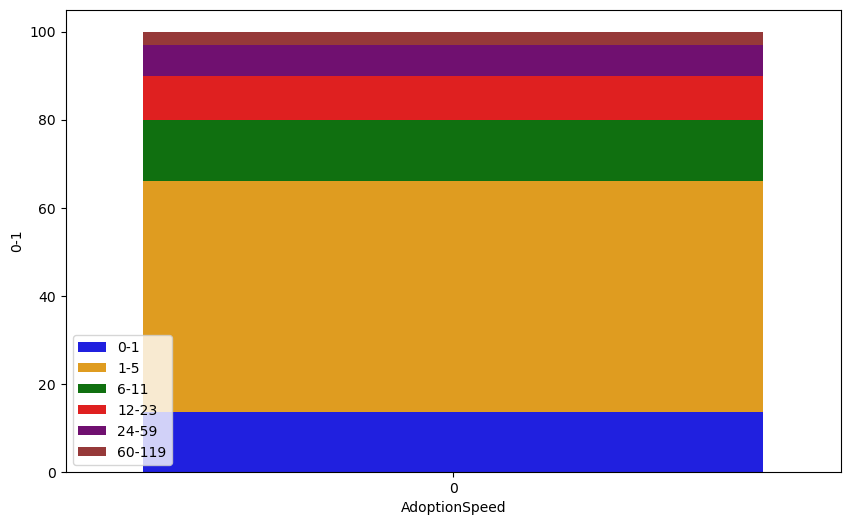

In [16]:
#verificamos los perfiles de adopción 0 y la variable Age (agrupando por rango de edades):

# Crear una columna 'Age_group' para agrupar las edades en rangos
adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 1, 6, 12, 24, 60, 120, 360], labels=['0-1', '1-5', '6-11', '12-23', '24-59', '60-119', '120+'])

# Calcular las frecuencias relativas al 100%
freq_table = pd.crosstab(adopted_in_0['AdoptionSpeed'], adopted_in_0['Age_group'], normalize='index') * 100

# Crear el gráfico de barras apiladas al 100%
plt.figure(figsize=(10, 6))
sns.barplot(x=freq_table.index, y=freq_table['0-1'], color='blue', label='0-1')
sns.barplot(x=freq_table.index, y=freq_table['1-5'], color='orange', bottom=freq_table['0-1'], label='1-5')
sns.barplot(x=freq_table.index, y=freq_table['6-11'], color='green', bottom=freq_table['0-1'] + freq_table['1-5'], label='6-11')
sns.barplot(x=freq_table.index, y=freq_table['12-23'], color='red', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'], label='12-23')
sns.barplot(x=freq_table.index, y=freq_table['24-59'], color='purple', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'] + freq_table['12-23'], label='24-59')
sns.barplot(x=freq_table.index, y=freq_table['60-119'], color='brown', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'] + freq_table['12-23'] + freq_table['24-59'], label='60-119')
sns.barplot(x=freq_table.index, y=freq_table['120+'], color='pink', bottom=freq_table['0-1'] + freq_table['1-5'] + freq_table['6-11'] + freq_table['12-23'] + freq_table['24-59'] + freq_table['60-119'], label='120+')
plt.title('Frecuencias Relativas de Velocidad de Adopción según Edad')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Porcentaje')
plt.legend(title='Edad')
plt.show()



C:\Users\HOME\AppData\Local\Temp\ipykernel_1116\1778108096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionSpeed', y='Age', data=adopted_in_0, palette='viridis')


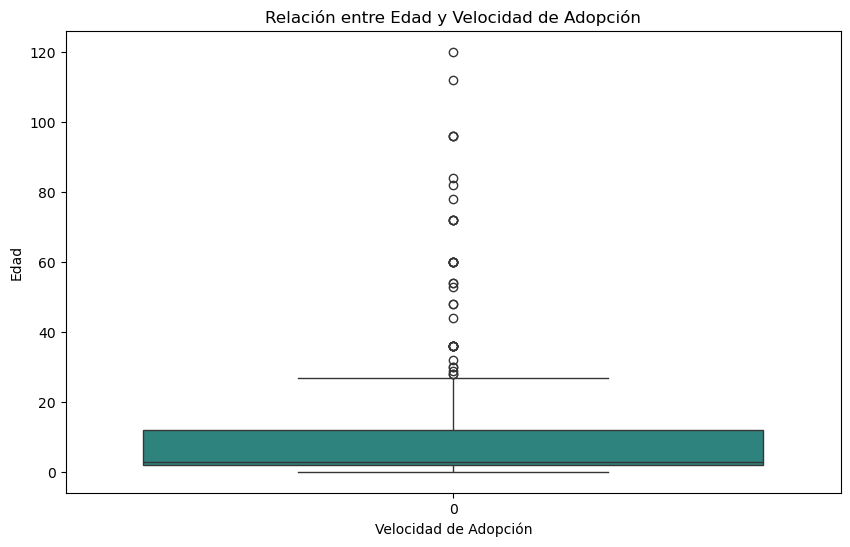

In [17]:
#hacemos un boxplot de la variable Age para la velocidad de adopción 0:

# Configuración de las visualizaciones
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionSpeed', y='Age', data=adopted_in_0, palette='viridis')
plt.title('Relación entre Edad y Velocidad de Adopción')
plt.xlabel('Velocidad de Adopción')
plt.ylabel('Edad')
plt.show()


In [18]:
#mostrar cuartiles de la variable Age para la velocidad de adopción 0:

# Calcular los cuartiles de la variable 'Age' para la velocidad de adopción 0
quartiles = adopted_in_0['Age'].quantile([0.25, 0.5, 0.75])

# Imprimir los resultados
print("Cuartil 25%:", quartiles[0.25])
print("Cuartil 50%:", quartiles[0.5])
print("Cuartil 75%:", quartiles[0.75])


Cuartil 25%: 2.0
Cuartil 50%: 3.0
Cuartil 75%: 12.0


In [19]:
#Creamos una nueva variable de edad factorizada asignando puppie al rango 0-12 meses, adult al rango 13-84 meses y senior al rango 85+ meses:

# Crear una columna 'Age_group' factorizada
adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 12, 84, 360], labels=['Puppie', 'Adult', 'Senior'])

# Mostrar las primeras 5 filas
adopted_in_0.head()


C:\Users\HOME\AppData\Local\Temp\ipykernel_1116\2239862452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adopted_in_0['Age_group'] = pd.cut(adopted_in_0['Age'], bins=[0, 12, 84, 360], labels=['Puppie', 'Adult', 'Senior'])


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Quantity_group,Age_group
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,Puppie
75,1,Coco,2,307,0,2,2,5,0,2,1,2,1,2,1,1,0,41336,31de822d0adce3e2dad7dcedfbee2ba8,0,Hi Coco is a rescued puppy from the streets. I...,259b10a3e,1.0,0,1,Puppie
106,2,SYLVESTER,1,266,266,3,1,7,0,2,1,1,1,2,1,2,1,41401,9b52af6d48a4521fd01d4028eb5879a3,0,"Kittens found living at restaurant, with sibli...",19b1f4263,3.0,0,2,Puppie
170,2,Sunset,2,292,252,1,2,5,0,1,1,2,2,2,1,1,0,41401,2181fc2a61447996c1e5cee02738b5c3,0,*** Looking for someone who really love and ad...,b9590d4de,1.0,0,1,Puppie
259,1,Chanelle,18,20,307,2,2,7,0,2,1,1,1,1,1,1,0,41401,c00756f2bdd8fa88fc9f07a8309f7d5d,0,Chanelle found a home!,1c59cecac,10.0,0,1,Adult


In [20]:
#verificamos cuantos registros de Sex=3 corresponden también a Quantity mayor a 1:

# Indicar los registros que contienen la combinación: Sex=3 y Quantity > 1:

#generamos una variable que indique Quantity > 1 =1, y Quantity=1 =0:

# Crear una columna 'Quantity_gt_1' para indicar si Quantity > 1
train['Quantity_gt_1'] = train['Quantity'].apply(lambda x: 1 if x > 1 else 0)

# Mostrar las primeras 5 filas

train.head()




,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,Quantity_group,Quantity_gt_1
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2,1,0
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0,1,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3,1,0
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2,1,0
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2,1,0


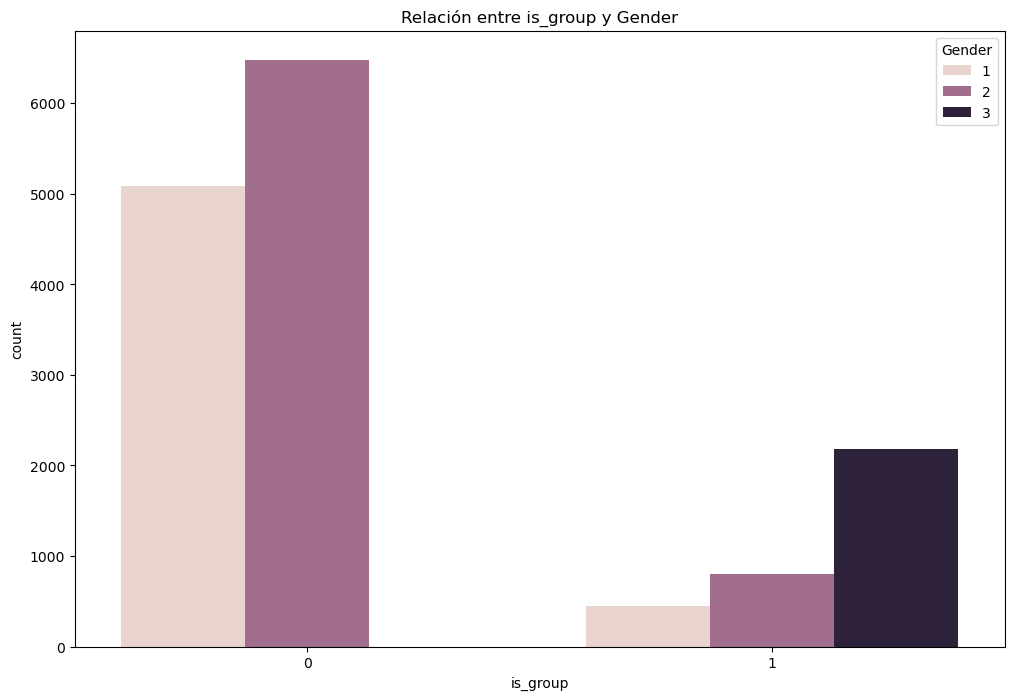

In [21]:
# Crear la columna is_group según la condición dada
train['is_group'] = train['Quantity'].apply(lambda x: 1 if x > 1 else 0)

# Graficar la relación entre is_group y Gender
sns.countplot(x='is_group', hue='Gender', data=train)
plt.title('Relación entre is_group y Gender')
plt.show()

In [23]:
#contamos la cantidad de registros de cada factor Quantity_gt_1 y su porcentaje:

# Calcular la cantidad de observaciones con Quantity > 1
quantity_gt_1_count = train['Quantity_gt_1'].sum()

# Calcular el porcentaje de observaciones con Quantity > 1
quantity_gt_1_percentage = quantity_gt_1_count / train.shape[0] * 100

print("Cantidad de Observaciones con Quantity > 1:", quantity_gt_1_count)

print("Porcentaje de Observaciones con Quantity > 1:", quantity_gt_1_percentage)

#Calcular el porcentaje de Quantity=1

# Calcular la cantidad de observaciones con Quantity = 1

quantity_1_count = train[train['Quantity'] == 1].shape[0]

# Calcular el porcentaje de observaciones con Quantity = 1
quantity_1_percentage = quantity_1_count / train.shape[0] * 100

print("Cantidad de Observaciones con Quantity = 1:", quantity_1_count)

print("Porcentaje de Observaciones con Quantity = 1:", quantity_1_percentage)

#verificamos la cantidad de registros de cada factor Quantity_gt_1 y su porcentaje:


    
    


Cantidad de Observaciones con Quantity > 1: 3428
Porcentaje de Observaciones con Quantity > 1: 22.86400320149403
Cantidad de Observaciones con Quantity = 1: 11565
Porcentaje de Observaciones con Quantity = 1: 77.13599679850597


In [32]:
#Sumamos la cantidad de mascotas totales de la variable Quantity:


# Calcular la cantidad total de mascotas
total_pets = train['Quantity'].sum()

print("Cantidad Total de Mascotas:", total_pets)



Cantidad Total de Mascotas: 23630


In [33]:
#cantidad de mascotas:

total_pets_registros = train['Quantity'].count()

print("Cantidad Total de registros", total_pets_registros)

Cantidad Total de registros 14993


In [34]:
#restamos cantidad total de mascotas y registros:


# Calcular la diferencia entre la cantidad total de mascotas y la cantidad total de registros
difference = total_pets - total_pets_registros


print("Diferencia entre la Cantidad Total de Mascotas y la Cantidad Total de Registros:", difference)


Diferencia entre la Cantidad Total de Mascotas y la Cantidad Total de Registros: 8637


In [ ]:
#* Chequear Variables Categóricas y convertirlas en Numéricas

#Chequear variables categoricas de todo el dataset y convertirlas a numericas

train.dtypes # Chequeamos los tipos de datos

# al parecer estan ok





Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [ ]:
#* Estandarizar o Normalizar

#no por el momento

In [ ]:
#Analizamos la cantidad de mascotas por raza (Breed1 y 2)

#recorremos el dataset y de cada registro almacenamos su breed1 y breed2 en un nuevo dataset
breed = pd.DataFrame()
breed['Breed'] = pd.concat([train['Breed1'], train['Breed2']]).value_counts().index
breed['Count'] = pd.concat([train['Breed1'], train['Breed2']]).value_counts().values
breed = breed.reset_index(drop=True)
breed

#salida: mayoritaria clase 0 (sumando Breed1 y Breed2) es la 307, seguida por la 307 y la 266. 

,Breed,Count
0,0,10767
1,307,7654
2,266,4233
3,265,1579
4,299,480
...,...,...
183,85,1
184,298,1
185,3,1
186,217,1


In [ ]:
#distinguimos las mascotas de raza pura
# Contar registros con valor distinto de 0 en Breed1 y valor igual a 0 en Breed2
breed1_nonzero_breed2_zero_count = train[(train['Breed1'] != 0) & (train['Breed2'] == 0)].shape[0]
 
# Contar registros donde Breed1 es igual a Breed2
breed1_equal_breed2_count = train[train['Breed1'] == train['Breed2']].shape[0]
 
# Imprimir resultados
print(f"Registros con Breed1 distinto de 0 y Breed2 igual a 0: {breed1_nonzero_breed2_zero_count}")
print(f"Registros con Breed1 igual a Breed2: {breed1_equal_breed2_count}")

Registros con Breed1 distinto de 0 y Breed2 igual a 0: 10762
Registros con Breed1 igual a Breed2: 1510


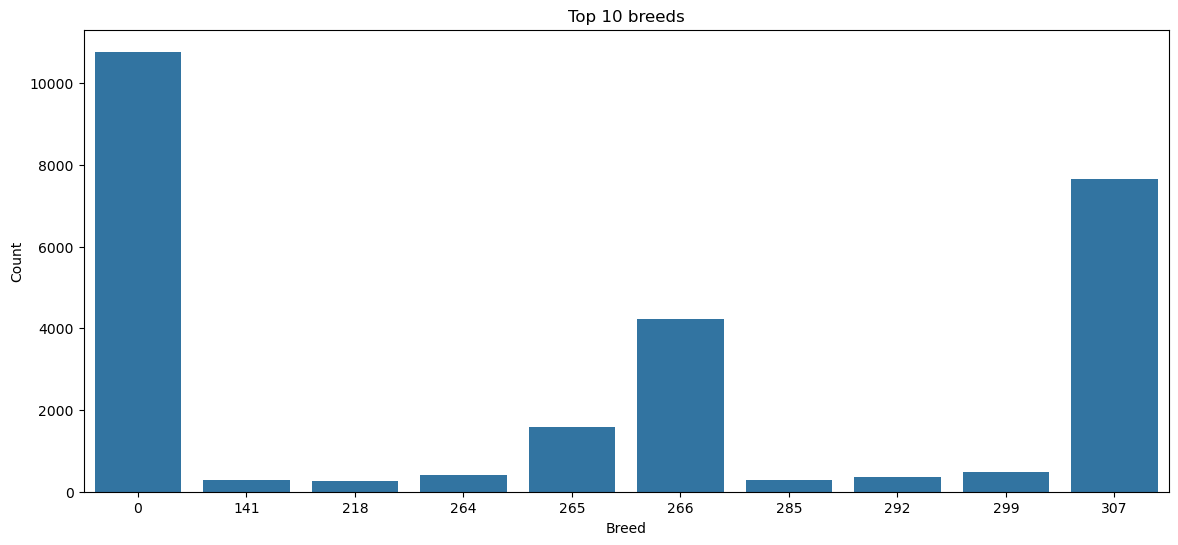

In [ ]:
#vemos las 10 razas mas comunes
#realizamos un histograama
plt.figure(figsize=(14, 6))
g = sns.barplot(x=breed['Breed'].head(10), y=breed['Count'].head(10))
plt.title('Top 10 breeds')
plt.show()

In [ ]:
#Analizamos el género de las mascotas:
# Contar los registros de la variable 'Gender'
conteo_genero = train['Gender'].value_counts()
print(conteo_genero)

#salida: Hay 

Gender
2    7277
1    5536
3    2180
Name: count, dtype: int64


## 4. Pre Procesamiento de datos


## 5. Feature Engeneering


## 6. Separa la base de Test y Train


### 7. Para la parte de Train, armar un esquema de Cross Validation


## 8. Desarrollar modelo datos estructurados

## 9. Desarrollar modelo(s) datos no estructurados (Opcional)

## 10. Desarrollar modelo ensamblado (Opcional)

## 11. Valoración del modelo/conclusiones